Project MSB

Menganalisa laporan harian untuk:

1. Meningkatkan Saldo Akhir Buku
2. Analisa berdasarkan kredit maupun debit
3. Kemungkinan customer datang per hari
4. Kemungkinan peraihan sales kedepannya dibandingkan dengan sales yang lain
5. Perbandingan performance antara stock gudang, hutang dan piutang
6. Perbandingan performance antara debit dan credit

Nomor 1 : MENINGKATKAN SALDO AKHIR BUKU

In [52]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from scipy import stats
from scipy.stats import poisson
import scipy.special as sc
from scipy.stats import binom

%matplotlib inline

In [2]:
rekap_xlsx = pd.read_excel('laporan_mei_2023(4)_edit.xlsx',sheet_name='rekap')
rekap_xlsx

,Unnamed: 0,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
0,2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
1,2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2,2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
3,2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
4,2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
5,2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
6,2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
7,2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
8,2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
9,2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09


In [3]:
rekap_xlsx = rekap_xlsx.rename(columns={'Unnamed: 0': 'Date'})
rekap_xlsx

,Date,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
0,2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
1,2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2,2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
3,2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
4,2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
5,2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
6,2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
7,2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
8,2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
9,2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09


In [4]:
rekap_xlsx = rekap_xlsx.set_index('Date')

In [5]:
rekap_xlsx

,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
Date,,,,
2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09


In [6]:
rekap_xlsx.index = pd.to_datetime(rekap_xlsx.index).strftime('%Y-%m-%d')

Plot Setiap Columns

<Axes: xlabel='Date'>

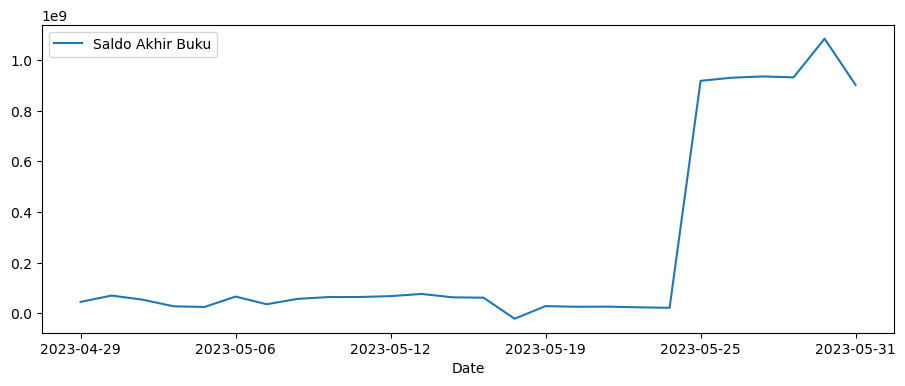

In [7]:
rekap_xlsx['Saldo Akhir Buku'].plot(legend=True,figsize=(11,4))

<Axes: xlabel='Date'>

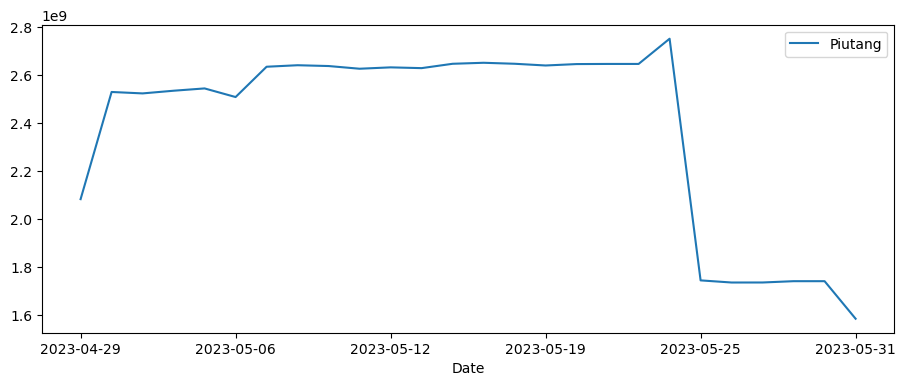

In [8]:
rekap_xlsx['Piutang'].plot(legend=True,figsize=(11,4))

<Axes: xlabel='Date'>

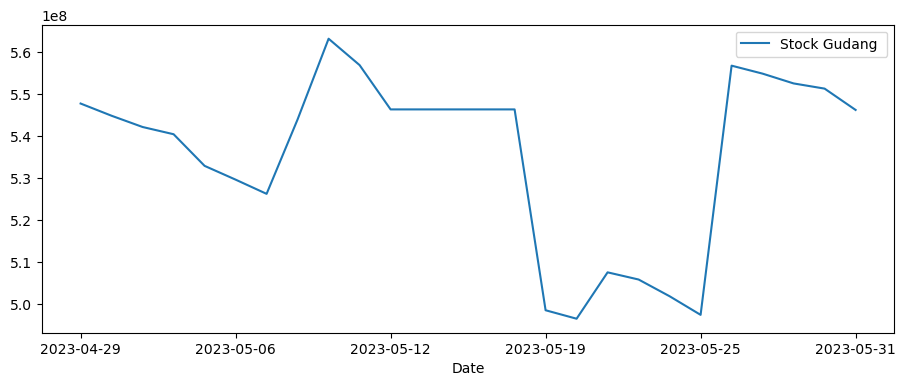

In [9]:
rekap_xlsx['Stock Gudang '].plot(legend=True,figsize=(11,4))

<Axes: xlabel='Date'>

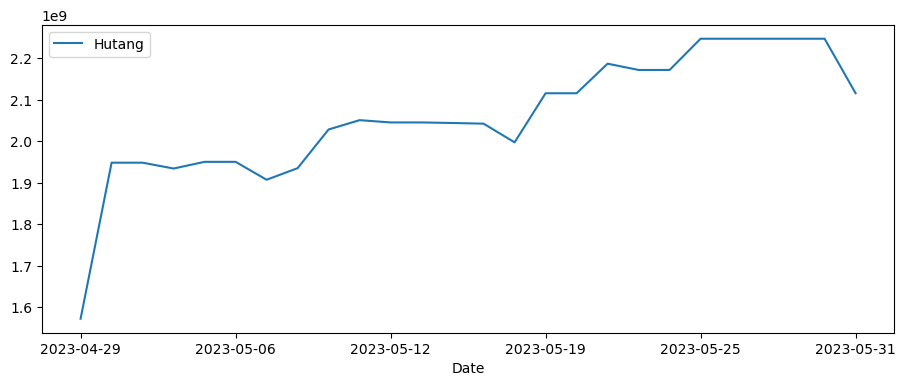

In [10]:
rekap_xlsx['Hutang'].plot(legend=True,figsize=(11,4))

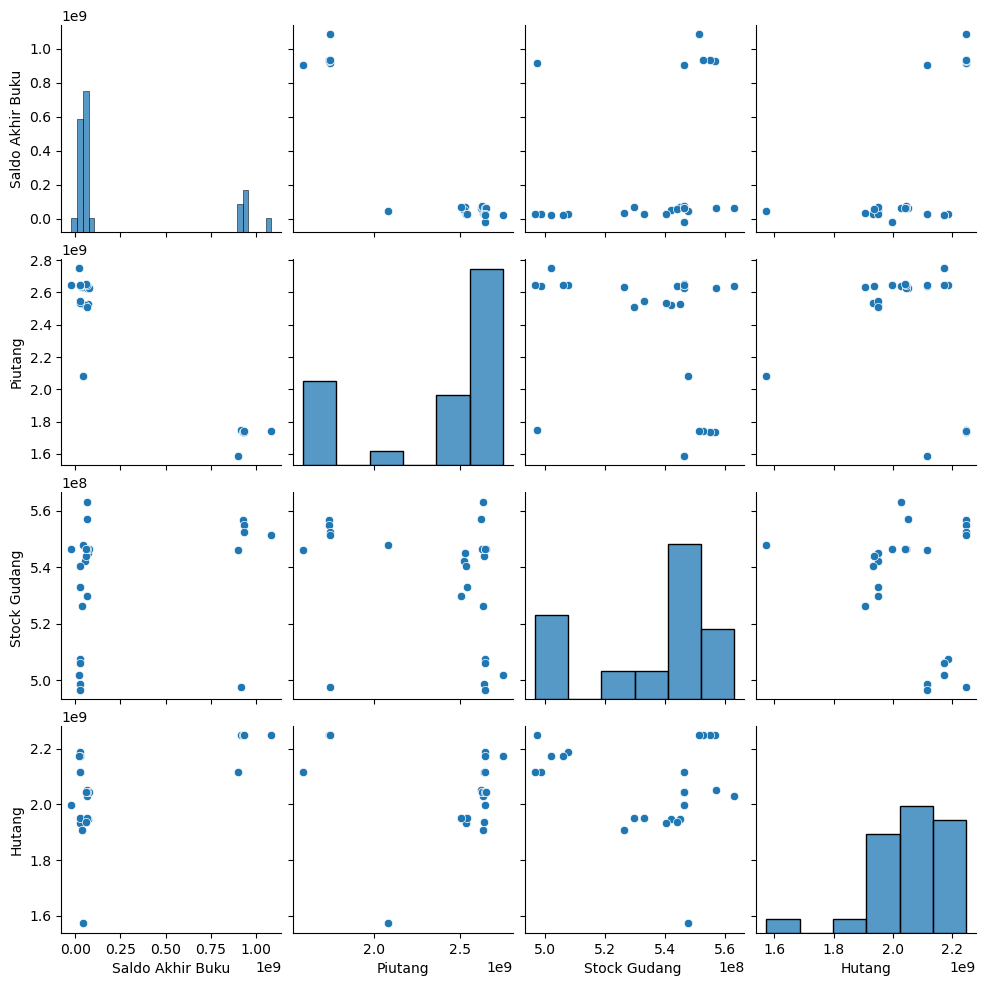

In [11]:
sns.pairplot(rekap_xlsx)

<Axes: >

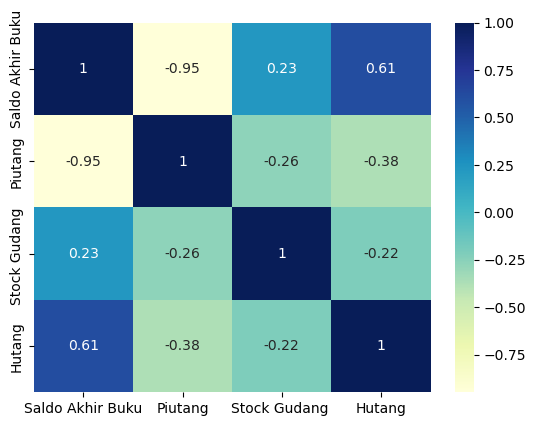

In [12]:
sns.heatmap(rekap_xlsx.corr(),cmap="YlGnBu",annot=True)

Analisa kolom 'Piutang'

<Axes: xlabel='Date'>

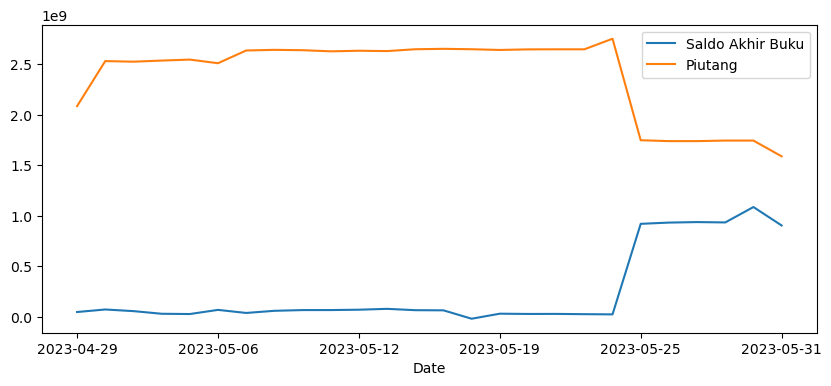

In [13]:
rekap_xlsx[['Saldo Akhir Buku','Piutang']].plot(subplots=False,figsize=(10,4))

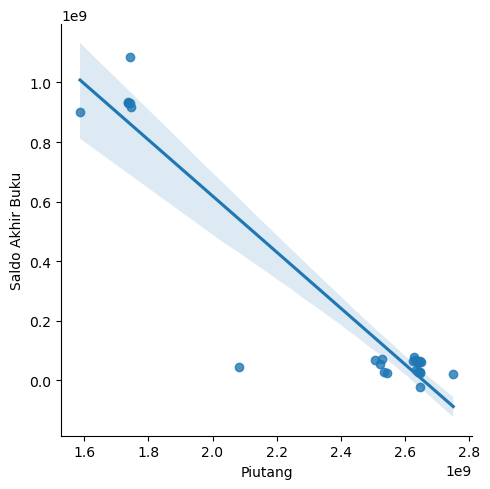

In [14]:
sns.lmplot(data=rekap_xlsx,x='Piutang',y='Saldo Akhir Buku')

In [15]:
rekap_xlsx[rekap_xlsx['Piutang'] > 2635000000]

,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
Date,,,,
2023-05-09,57459916.0,2.640621e+09,5.439398e+08,1.935443e+09
2023-05-10,64672153.0,2.637266e+09,5.631082e+08,2.028700e+09
2023-05-15,63648380.0,2.646647e+09,5.463127e+08,2.044319e+09
2023-05-16,62116880.0,2.650819e+09,5.463127e+08,2.042669e+09
2023-05-17,-20864120.0,2.646727e+09,5.463127e+08,1.997669e+09
2023-05-19,28916180.0,2.639537e+09,4.985907e+08,2.115956e+09
2023-05-20,26345180.0,2.645412e+09,4.965788e+08,2.115956e+09
2023-05-22,26830108.0,2.645995e+09,5.075980e+08,2.187256e+09
2023-05-23,24177848.0,2.645995e+09,5.058941e+08,2.172136e+09


In [16]:
X_piutang = rekap_xlsx['Piutang']
X_piutang = np.vstack([X_piutang, np.ones(len(X_piutang))]).T
Y_piutang = rekap_xlsx['Saldo Akhir Buku']

model_piutang = LinearRegression()
model_piutang.fit(X_piutang,Y_piutang)

LinearRegression()

In [17]:
coef_piutang = model_piutang.coef_
print(coef_piutang[0])

-0.9414832834983942


In [18]:
new_piutang = DataFrame({'Piutang': [1400000000, 2600000000], '':0})
predicted_piutang = model_piutang.predict(new_piutang)
print('Predicted saldo akhir max berdasarkan piutang : ', predicted_piutang[0])
print('Predicted saldo akhir min berdasarkan piutang : ', predicted_piutang[1])

Predicted saldo akhir max berdasarkan piutang :  1183867038.2217178
Predicted saldo akhir min berdasarkan piutang :  54087098.023644924


C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [19]:
model_piutang.score(X_piutang,Y_piutang)

0.900507431775263

<Axes: xlabel='Piutang', ylabel='Saldo Akhir Buku'>

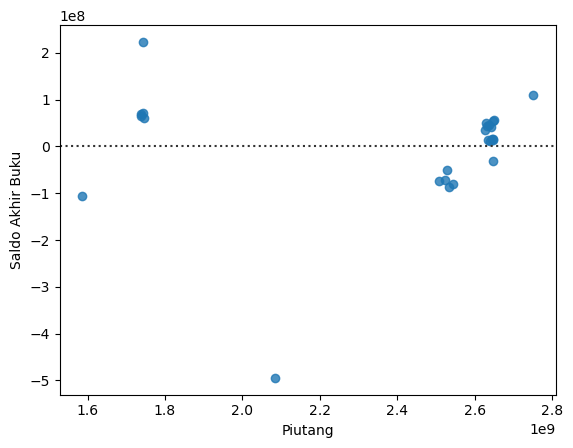

In [20]:
sns.residplot(data=rekap_xlsx, x='Piutang', y='Saldo Akhir Buku')

Analisa kolom 'Stock Gudang'

<Axes: xlabel='Date'>

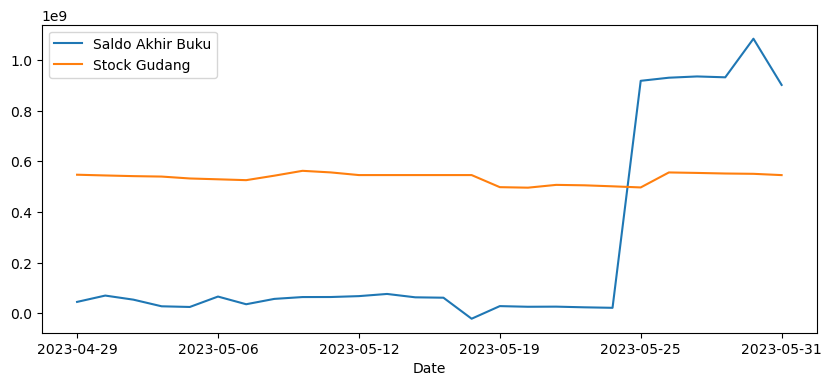

In [21]:
rekap_xlsx[['Saldo Akhir Buku','Stock Gudang ']].plot(subplots=False,figsize=(10,4))

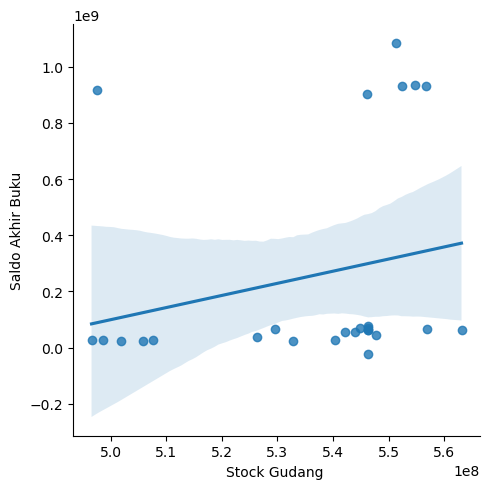

In [22]:
sns.lmplot(data=rekap_xlsx,x='Stock Gudang ',y='Saldo Akhir Buku')

In [23]:
rekap_xlsx[rekap_xlsx['Stock Gudang '] > 545000000]

,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
Date,,,,
2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09
2023-05-12,6.835315e+07,2.631759e+09,5.463127e+08,2.045627e+09
2023-05-13,7.693285e+07,2.628543e+09,5.463127e+08,2.045627e+09
2023-05-15,6.364838e+07,2.646647e+09,5.463127e+08,2.044319e+09
2023-05-16,6.211688e+07,2.650819e+09,5.463127e+08,2.042669e+09
2023-05-17,-2.086412e+07,2.646727e+09,5.463127e+08,1.997669e+09
2023-05-26,9.307430e+08,1.737142e+09,5.567071e+08,2.247401e+09


In [24]:
total_stock = rekap_xlsx['Stock Gudang '].sum()
total_stock

13928806884.986622

Text(0.5, 1.0, 'Stock Gudang Cost Breakdown')

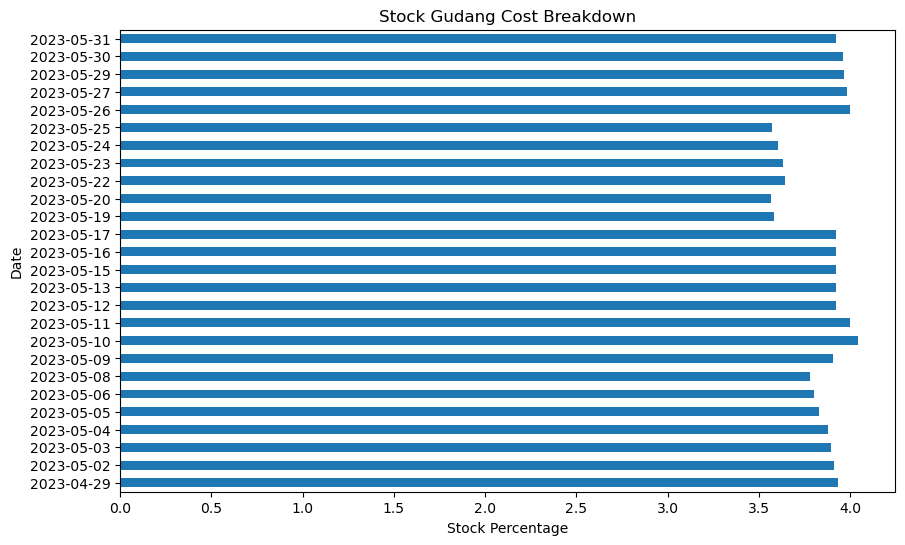

In [25]:
pect_stock = (rekap_xlsx['Stock Gudang '] / total_stock) * 100
plt.figure(figsize=(10,6))
pect_stock.plot(kind='barh')
plt.xlabel('Stock Percentage')
plt.ylabel('Date')
plt.title('Stock Gudang Cost Breakdown')

Text(0.5, 1.0, 'Optimize Stock Gudang Cost')

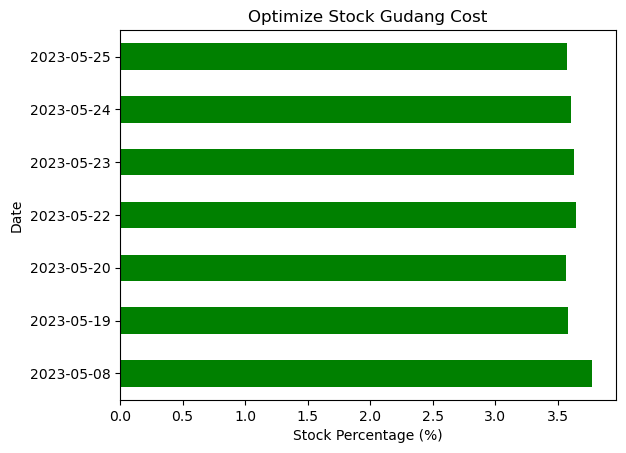

In [26]:
stock_threshold = 3.8
stock_optimize_area = pect_stock[pect_stock < stock_threshold]
stock_optimize_area.plot(kind='barh', color='green')
plt.xlabel('Stock Percentage (%)')
plt.ylabel('Date')
plt.title('Optimize Stock Gudang Cost')

Text(0.5, 1.0, 'Reduce this Stock Gudang Cost')

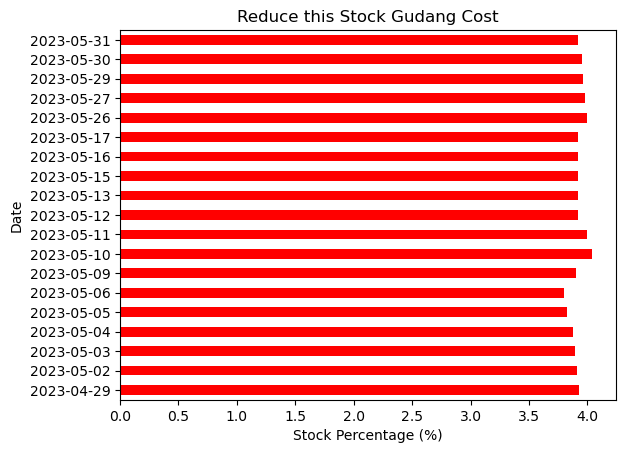

In [27]:
stock_reduction_area = pect_stock[pect_stock > stock_threshold]
stock_reduction_area.plot(kind='barh', color='red')
plt.xlabel('Stock Percentage (%)')
plt.ylabel('Date')
plt.title('Reduce this Stock Gudang Cost')

In [28]:
X_stock = rekap_xlsx['Stock Gudang ']
X_stock = np.vstack([X_stock, np.ones(len(X_stock))]).T
Y_stock = rekap_xlsx['Saldo Akhir Buku']

model_stock = LinearRegression()
model_stock.fit(X_stock,Y_stock)

LinearRegression()

In [29]:
coef_stock = model_stock.coef_
print(coef_stock[0])

4.3167760471083705


In [30]:
model_stock.score(X_stock,Y_stock)

0.053039285892419796

Analisa kolom 'Hutang'

<Axes: xlabel='Date'>

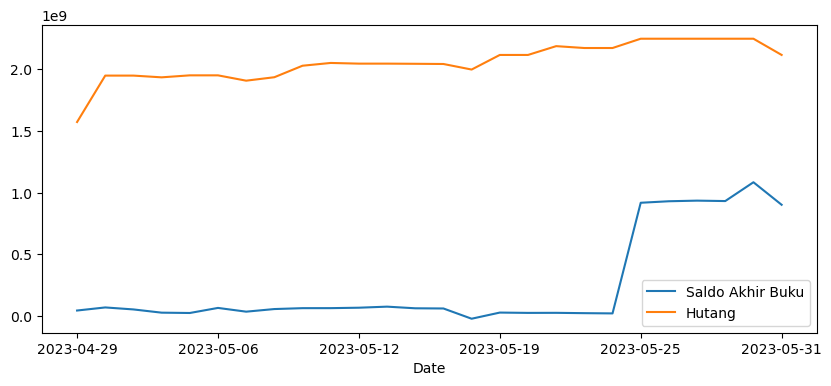

In [31]:
rekap_xlsx[['Saldo Akhir Buku','Hutang']].plot(subplots=False,figsize=(10,4))

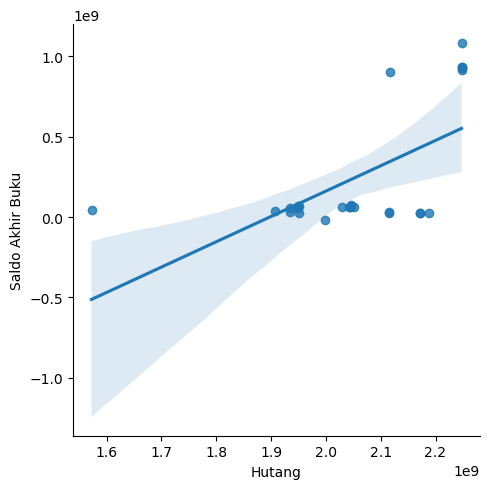

In [32]:
sns.lmplot(data=rekap_xlsx,x='Hutang',y='Saldo Akhir Buku')

In [33]:
rekap_xlsx[rekap_xlsx['Hutang'] > 2100000000]

,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
Date,,,,
2023-05-19,2.891618e+07,2.639537e+09,4.985907e+08,2.115956e+09
2023-05-20,2.634518e+07,2.645412e+09,4.965788e+08,2.115956e+09
2023-05-22,2.683011e+07,2.645995e+09,5.075980e+08,2.187256e+09
2023-05-23,2.417785e+07,2.645995e+09,5.058941e+08,2.172136e+09
2023-05-24,2.221285e+07,2.750839e+09,5.019198e+08,2.172136e+09
2023-05-25,9.185085e+08,1.746012e+09,4.974976e+08,2.247401e+09
2023-05-26,9.307430e+08,1.737142e+09,5.567071e+08,2.247401e+09
2023-05-27,9.357430e+08,1.737245e+09,5.548110e+08,2.247401e+09
2023-05-29,9.323166e+08,1.742682e+09,5.524851e+08,2.247401e+09


Text(0.5, 1.0, 'Hutang Cost Brakdown')

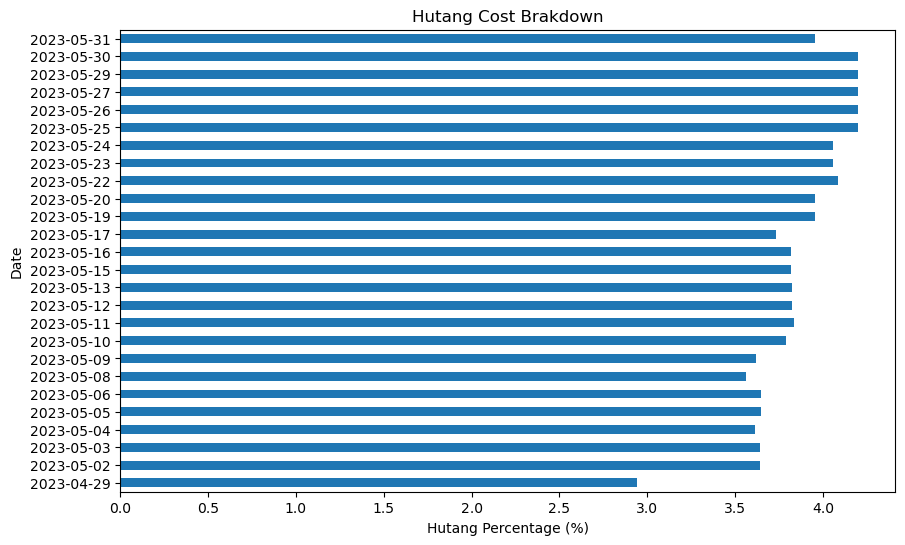

In [34]:
total_hutang = rekap_xlsx['Hutang'].sum()
pect_hutang = (rekap_xlsx['Hutang'] / total_hutang) * 100
plt.figure(figsize=(10,6))
pect_hutang.plot(kind='barh')
plt.xlabel('Hutang Percentage (%)')
plt.ylabel('Date')
plt.title('Hutang Cost Brakdown')

Text(0.5, 1.0, 'Optimize Hutang Cost')

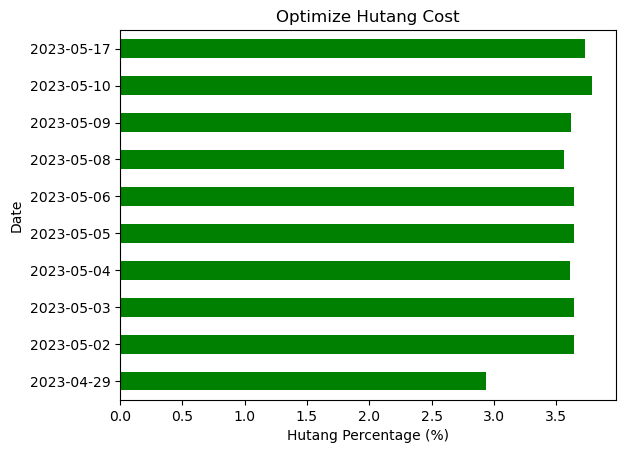

In [35]:
hutang_threshold = 3.8
hutang_optimize_area = pect_hutang[pect_hutang < hutang_threshold]
hutang_optimize_area.plot(kind='barh',color='green')
plt.xlabel('Hutang Percentage (%)')
plt.ylabel('Date')
plt.title('Optimize Hutang Cost')

Text(0.5, 1.0, 'Reduce this Hutang Cost')

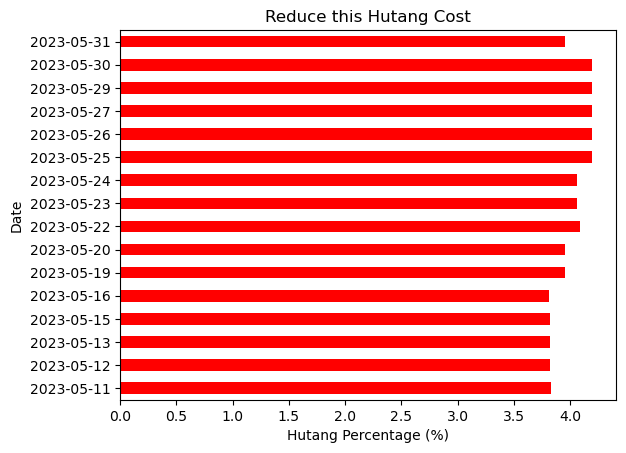

In [36]:
hutang_reduction_area = pect_hutang[pect_hutang > hutang_threshold]
hutang_reduction_area.plot(kind='barh',color='red')
plt.xlabel('Hutang Percentage (%)')
plt.ylabel('Date')
plt.title('Reduce this Hutang Cost')

In [37]:
X_hutang = rekap_xlsx['Hutang']
X_hutang = np.vstack([X_hutang, np.ones(len(X_hutang))]).T
Y_hutang = rekap_xlsx['Saldo Akhir Buku']

model_hutang = LinearRegression()
model_hutang.fit(X_hutang,Y_hutang)

LinearRegression()

In [38]:
coef_hutang = model_hutang.coef_
print(coef_hutang[0])

1.5781865326896298


In [39]:
model_hutang.score(X_hutang,Y_hutang)

0.3733024375331401

Predicted saldo akhir buku berdasarkan stock gudang dan hutang

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(rekap_xlsx[['Stock Gudang ','Hutang']], 
                                                    rekap_xlsx['Saldo Akhir Buku'],test_size=0.2, random_state=42)
model_pred = LinearRegression()
model_pred.fit(X_train, Y_train)

LinearRegression()

In [41]:
Y_pred = model_pred.predict(X_test)
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)

Mean Squared Error:  1.9699992767653862e+17
Mean Absolute Error:  348083503.017984


In [42]:
future_stock = 500000000
future_hutang = 2000000000
future_saldo_akhir = model_pred.predict([[future_stock,future_hutang]])

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


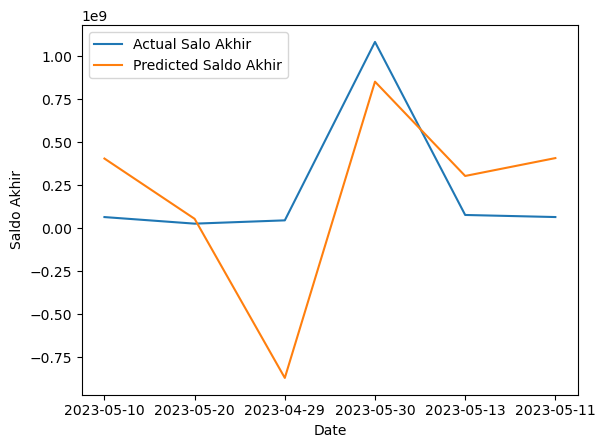

In [43]:
plt.plot(X_test.index, Y_test, label='Actual Salo Akhir')
plt.plot(X_test.index, Y_pred, label='Predicted Saldo Akhir')
plt.xlabel('Date')
plt.ylabel('Saldo Akhir')
plt.legend()
plt.show()

Analisa sensitifitas saldo akhir buku terhadap stock gudang dan hutang

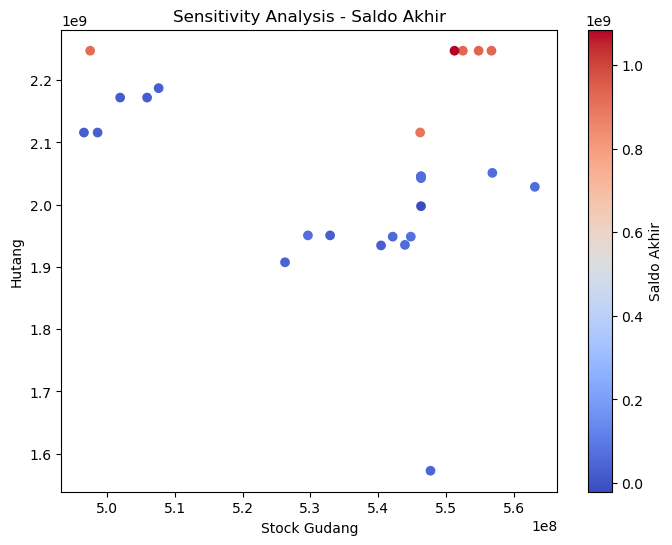

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(rekap_xlsx['Stock Gudang '], rekap_xlsx['Hutang'], c=rekap_xlsx['Saldo Akhir Buku'], cmap='coolwarm')
plt.xlabel('Stock Gudang')
plt.ylabel('Hutang')
plt.title('Sensitivity Analysis - Saldo Akhir')
plt.colorbar(label='Saldo Akhir')
plt.show()

Nomor 2 : ANALISA BERDASARKAN DEBIT MAUPUN KREDIT

Analisa seberapa banyak yang menggunakan debit maupun kredit

In [45]:
total_debit_credit = pd.read_excel('laporan_mei_2023(6)_edit.xlsx',sheet_name='total_debit_credit',names=['Date','Debit','Credit'])
total_debit_credit

,Date,Debit,Credit
0,2023-05-02,5.920772e+07,4.102612e+08
1,2023-05-03,9.265000e+06,2.542550e+07
2,2023-05-04,3.150020e+07,4.361693e+07
3,2023-05-05,1.428500e+06,2.020470e+07
4,2023-05-06,4.608030e+07,4.971500e+06
5,2023-05-08,6.675464e+07,5.191140e+07
6,2023-05-09,2.132750e+07,2.809800e+07
7,2023-05-10,2.484460e+07,1.108892e+08
8,2023-05-11,3.712000e+06,3.259000e+07
9,2023-05-12,1.469000e+07,5.644500e+06


In [46]:
total_debit_credit = total_debit_credit.set_index('Date')
total_debit_credit

,Debit,Credit
Date,,
2023-05-02,5.920772e+07,4.102612e+08
2023-05-03,9.265000e+06,2.542550e+07
2023-05-04,3.150020e+07,4.361693e+07
2023-05-05,1.428500e+06,2.020470e+07
2023-05-06,4.608030e+07,4.971500e+06
2023-05-08,6.675464e+07,5.191140e+07
2023-05-09,2.132750e+07,2.809800e+07
2023-05-10,2.484460e+07,1.108892e+08
2023-05-11,3.712000e+06,3.259000e+07


In [47]:
total_debit_credit.index = pd.to_datetime(total_debit_credit.index).strftime('%Y-%m-%d')

<Axes: ylabel='Date'>

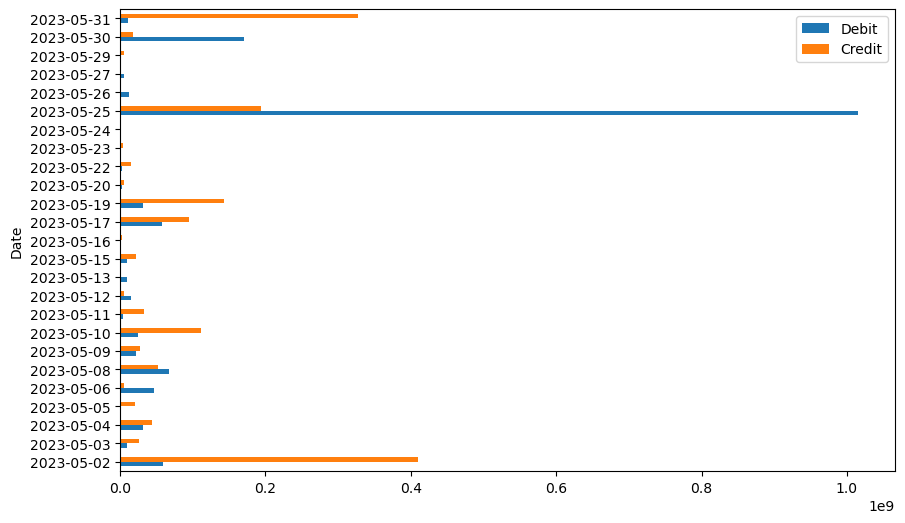

In [48]:
total_debit_credit[['Debit','Credit']].plot(kind='barh',subplots=False,figsize=(10,6))

Analisa siapa saja yang sering menggunakan debit maupun kredit

In [49]:
debit_credit = pd.read_excel('laporan_mei_2023(7)_edit.xlsx',sheet_name='debit_credit',
                             names=['Customer','No Faktur','Debit','Credit'])
debit_credit

,Customer,No Faktur,Debit,Credit
0,Apotek Asean 123,SI.2023.04.00128,1050000.0,NaN
1,Apotek Asean 123,SI.2023.04.00135,381000.0,NaN
2,Apotek Asean 123 (POTONG TAGHAN KARNA ADA KELE...,NaN,NaN,700000.0
3,APOTEK SANUR,SI.2023.04.00141,1440000.0,NaN
4,WAHYU (PAK EDI),SI.2023.05.00229,180000.0,NaN
...,...,...,...,...
560,APOTEK SARI ANDA 2,SI.2023.03.00102,2300000.0,NaN
561,APOTEK SARI ANDA 2,SINT.2023.03.00089,340000.0,NaN
562,APOTEK SARI ANDA 2,SI.2023.04.00099,255000.0,NaN
563,APOTEK DERI FARMA,SINT.2023.03.00112,110000.0,NaN


<Axes: ylabel='Customer'>

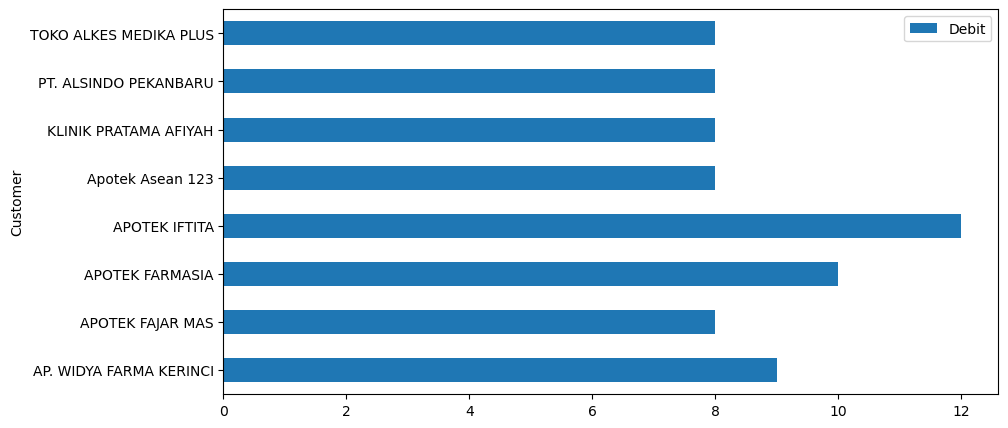

In [50]:
debit_count_df = DataFrame(debit_credit.groupby('Customer').count()['Debit'])
debit_count_df = debit_count_df[debit_count_df['Debit'] != 0]
debit_count_df = debit_count_df[debit_count_df['Debit'] > 6]
debit_count_df.plot(kind='barh',figsize=(10,5))

<Axes: ylabel='Customer'>

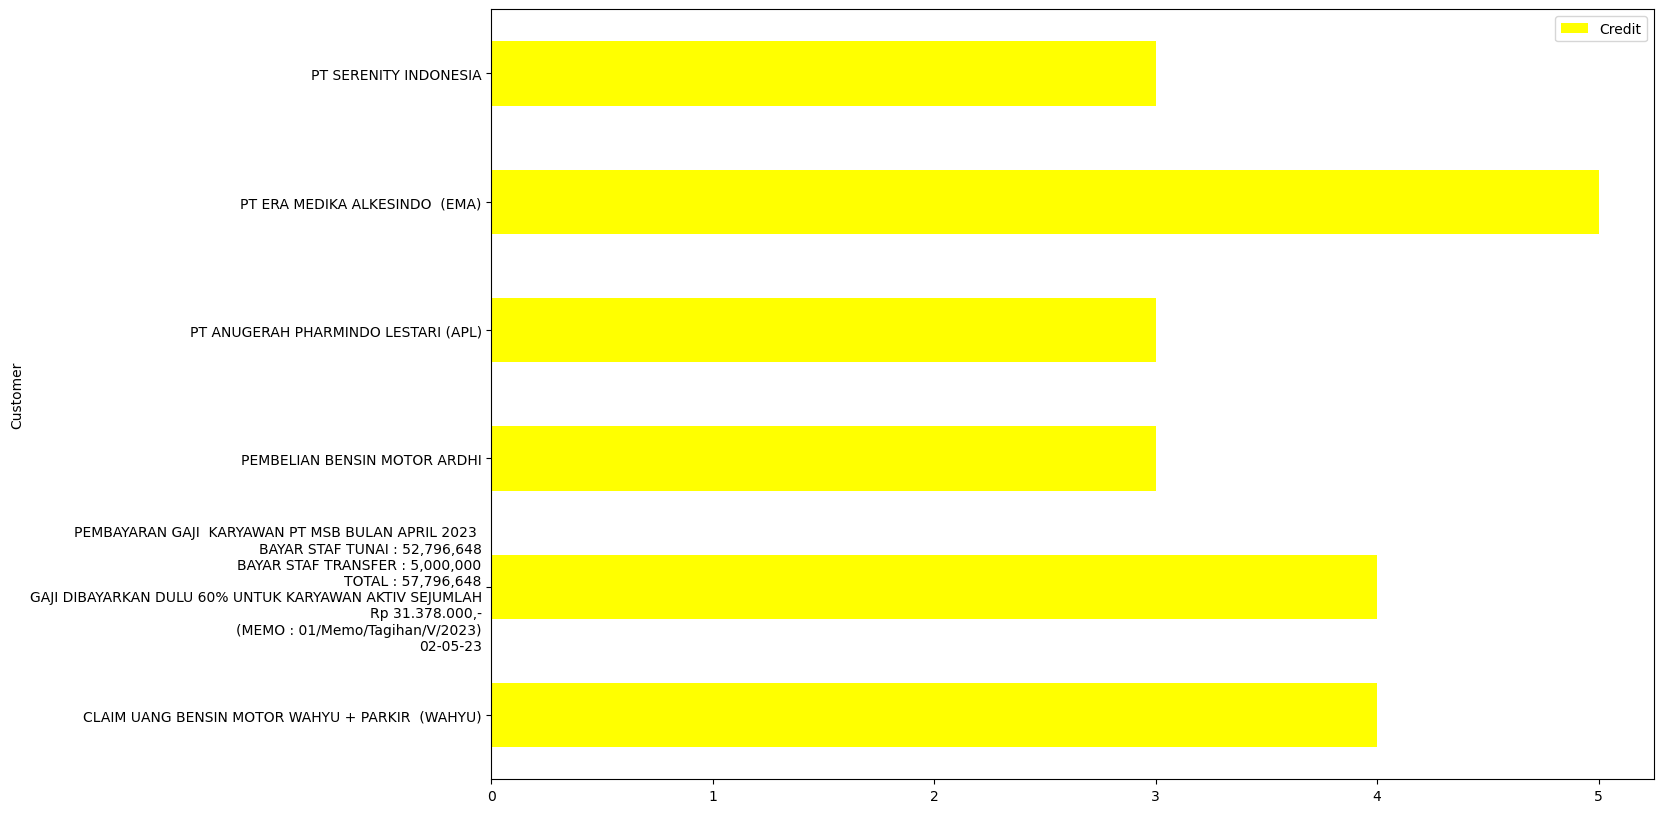

In [51]:
debit_count_df = DataFrame(debit_credit.groupby('Customer').count()['Credit'])
debit_count_df = debit_count_df[debit_count_df['Credit'] != 0]
debit_count_df = debit_count_df[debit_count_df['Credit'] > 2]
debit_count_df.plot(kind='barh',figsize=(15,10), color='yellow')

Nomor 3 : Kemungkinan customer datang per hari

In [53]:
# kemungkinan 25 customer datang per hari
average_arrival_rate = 18
poisson_prob_arrival = math.exp(-average_arrival_rate) * (average_arrival_rate**25) / math.factorial(25)
print('probability of  customers arriving per day is %2.2f %%' %(poisson_prob_arrival*100))

probability of  customers arriving per day is 2.37 %


Text(0.5, 1.0, 'Kemungkinan customer datang rata - rata per hari')

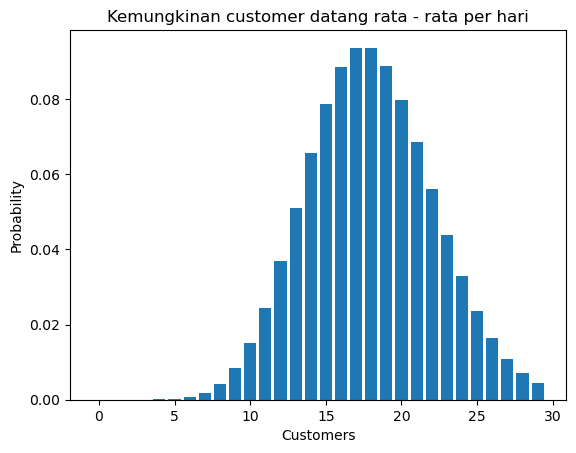

In [54]:
k_arrival = np.arange(30)
lamb_arrival = 18
pois_arrival = poisson.pmf(k_arrival,lamb_arrival)
plt.bar(k_arrival,pois_arrival)
plt.xlabel('Customers')
plt.ylabel('Probability')
plt.title('Kemungkinan customer datang rata - rata per hari')

In [55]:
k_arrival2,mu_arrival2 = 18,18

prob_up_to_eighteen = poisson.cdf(k_arrival2,mu_arrival2)
prob_more_than_eighteen = 1 - prob_up_to_eighteen
print('The probability that 18 or less customers show up is %2.1f %%.' %(100*prob_up_to_eighteen))
print('The probability that more than eighteen customers show up during lunch rush is %2.1f %%.' %(100*prob_more_than_eighteen))

The probability that 18 or less customers show up is 56.2 %.
The probability that more than eighteen customers show up during lunch rush is 43.8 %.


Nomor 4 : Kemungkinan peraihan sales kedepannya dibandingkan dengan sales yang lain

In [56]:
# Kemungkinan peraihan sales kedepannya dibandingkan dengan sales yang lain
p_iwan = .85
iwan = 227

p_wahyu = .65
wahyu = 30

p_mardi = .88
mardi = 66

p_herwan = .93
herwan = 91

p_adlan = .90
adlan = 11

k_iwan = 190
k_wahyu = 20
k_mardi = 60
k_herwan = 85
k_adlan = 9

comb_iwan = sc.comb(iwan,k_iwan)
answer_iwan = comb_iwan * (p_iwan**k_iwan) * ((1-p_iwan)**(iwan-k_iwan))

comb_wahyu = sc.comb(wahyu,k_wahyu)
answer_wahyu = comb_wahyu * (p_wahyu**k_wahyu) * ((1-p_wahyu)**(wahyu-k_wahyu))

comb_mardi = sc.comb(mardi,k_mardi)
answer_mardi = comb_mardi * (p_mardi**k_mardi) * ((1-p_mardi)**(mardi-k_mardi))

comb_herwan = sc.comb(herwan,k_herwan)
answer_herwan = comb_herwan * (p_herwan**k_herwan) * ((1-p_herwan)**(herwan-k_herwan))

comb_adlan = sc.comb(adlan,k_adlan)
answer_adlan = comb_adlan * (p_adlan**k_adlan) * ((1-p_adlan)**(adlan-k_adlan))

print(' The probability of pak iwan making 190 in sales is %.2f%% ' %(answer_iwan*100))
print(' The probability of pak wahyu making 20 in sales is %.2f%% ' %(answer_wahyu*100))
print(' The probability of pak mardi making 60 in sales is %.2f%% ' %(answer_mardi*100))
print(' The probability of pak herwan making 85 in sales is %.2f%% ' %(answer_herwan*100))
print(' The probability of pak adlan making 9 in sales is %.2f%% ' %(answer_adlan*100))

 The probability of pak iwan making 190 in sales is 6.17% 
 The probability of pak wahyu making 20 in sales is 15.02% 
 The probability of pak mardi making 60 in sales is 12.66% 
 The probability of pak herwan making 85 in sales is 16.42% 
 The probability of pak adlan making 9 in sales is 21.31% 


In [57]:
mu_iwan = iwan * p_iwan
mu_wahyu = wahyu * p_wahyu
mu_mardi = mardi * p_mardi
mu_herwan = herwan * p_herwan
mu_adlan = adlan * p_adlan

sigma_iwan = (iwan*p_iwan*(1-p_iwan))**0.5
sigma_wahyu = (wahyu*p_wahyu*(1-p_wahyu))**0.5
sigma_mardi = (mardi*p_mardi*(1-p_mardi))**0.5
sigma_herwan = (herwan*p_herwan*(1-p_herwan))**0.5
sigma_adlan = (adlan*p_adlan*(1-p_adlan))**0.5

print('Iwan will make sales of %.2f +/- %.2f ' %(mu_iwan,sigma_iwan))
print('Wahyu will make sales of %.2f +/- %.2f ' %(mu_wahyu,sigma_wahyu))
print('Mardi will make sales of %.2f +/- %.2f ' %(mu_mardi,sigma_mardi))
print('Herwan will mak sales of %.2f +/- %.2f ' %(mu_herwan,sigma_herwan))
print('Adlan will make sales of %.2f +/- %.2f ' %(mu_adlan,sigma_adlan))

Iwan will make sales of 192.95 +/- 5.38 
Wahyu will make sales of 19.50 +/- 2.61 
Mardi will make sales of 58.08 +/- 2.64 
Herwan will mak sales of 84.63 +/- 2.43 
Adlan will make sales of 9.90 +/- 0.99 


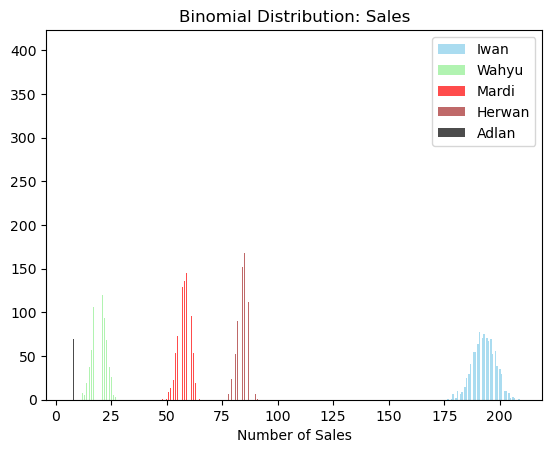

In [58]:
binomial_iwan = np.random.binomial(iwan, p_iwan, 1000)
binomial_wahyu = np.random.binomial(wahyu, p_wahyu, 1000)
binomial_mardi = np.random.binomial(mardi, p_mardi, 1000)
binomial_herwan = np.random.binomial(herwan, p_herwan, 1000)
binomial_adlan = np.random.binomial(adlan, p_adlan, 1000)

plt.hist(binomial_iwan, bins=50, alpha=0.7, label='Iwan', color='skyblue')
plt.hist(binomial_wahyu, bins=50, alpha=0.7, label='Wahyu', color='lightgreen')
plt.hist(binomial_mardi, bins=50, alpha=0.7, label='Mardi', color='red')
plt.hist(binomial_herwan, bins=50, alpha=0.7, label='Herwan', color='brown')
plt.hist(binomial_adlan, bins=50, alpha=0.7, label='Adlan', color='black')
plt.xlabel('Number of Sales')
plt.title('Binomial Distribution: Sales')
plt.legend()
plt.show()

Nomor 5 : Perbandingan performance antara stock gudang, hutang dan piutang

In [60]:
rekap_xlsx = pd.read_excel('laporan_mei_2023(4)_edit.xlsx',sheet_name='rekap')
rekap_xlsx

,Unnamed: 0,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
0,2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
1,2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2,2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
3,2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
4,2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
5,2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
6,2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
7,2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
8,2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
9,2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09


In [61]:
rekap_xlsx = rekap_xlsx.rename(columns={'Unnamed: 0': 'Date'})
rekap_xlsx

,Date,Saldo Akhir Buku,Piutang,Stock Gudang,Hutang
0,2023-04-29,4.553961e+07,2.083755e+09,5.477101e+08,1.572597e+09
1,2023-05-02,7.054432e+07,2.529391e+09,5.448049e+08,1.948656e+09
2,2023-05-03,5.438382e+07,2.523453e+09,5.421333e+08,1.948656e+09
3,2023-05-04,2.819710e+07,2.534601e+09,5.404154e+08,1.934586e+09
4,2023-05-05,2.554140e+07,2.544171e+09,5.328979e+08,1.950706e+09
5,2023-05-06,6.665020e+07,2.508345e+09,5.296257e+08,1.950706e+09
6,2023-05-08,3.630542e+07,2.634360e+09,5.262490e+08,1.907518e+09
7,2023-05-09,5.745992e+07,2.640621e+09,5.439398e+08,1.935443e+09
8,2023-05-10,6.467215e+07,2.637266e+09,5.631082e+08,2.028700e+09
9,2023-05-11,6.483215e+07,2.626062e+09,5.568374e+08,2.051152e+09


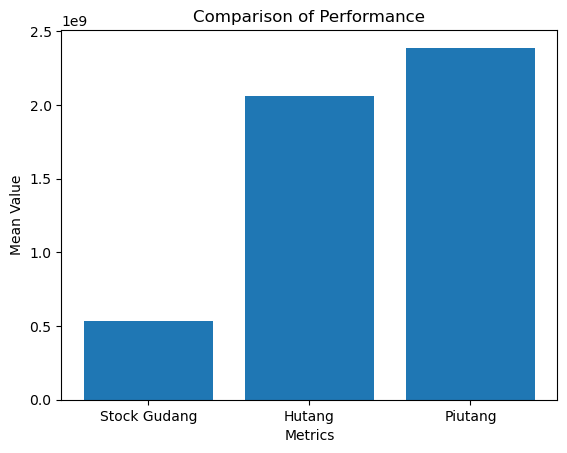

Inventory Mean:  535723341.7302547
Debt Mean:  2058506062.656923
Receivables Mean:  2387947836.978077
Inventory Standard Deviation:  20861636.42109689
Debt Standard Deviation:  151384404.25636613
Receivables Standard Deviation:  394130544.8099993
f-statistic:  426.1860378800264
p-value:  1.1034987049196444e-41


In [62]:
inventory_data = rekap_xlsx['Stock Gudang ']
debt_data = rekap_xlsx['Hutang']
receivables_data = rekap_xlsx['Piutang']

inventory_mean = inventory_data.mean()
debt_mean = debt_data.mean()
receivables_mean = receivables_data.mean()

inventory_std = inventory_data.std()
debt_std = debt_data.std()
receivables_std = receivables_data.std()

f_statistic, p_value = stats.f_oneway(inventory_data, debt_data, receivables_data)

metrics = ['Stock Gudang', 'Hutang', 'Piutang']
values = [inventory_mean, debt_mean, receivables_mean]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Performance')
plt.show()

print("Inventory Mean: ", inventory_mean)
print("Debt Mean: ", debt_mean)
print("Receivables Mean: ", receivables_mean)
print("Inventory Standard Deviation: ", inventory_std)
print("Debt Standard Deviation: ", debt_std)
print("Receivables Standard Deviation: ", receivables_std)
print("f-statistic: ", f_statistic)
print("p-value: ", p_value)

Nomor 6 : Perbandingan performance antara debit dan credit

In [59]:
total_debit_credit = pd.read_excel('laporan_mei_2023(6)_edit.xlsx',sheet_name='total_debit_credit',names=['Date','Debit','Credit'])
total_debit_credit

,Date,Debit,Credit
0,2023-05-02,5.920772e+07,4.102612e+08
1,2023-05-03,9.265000e+06,2.542550e+07
2,2023-05-04,3.150020e+07,4.361693e+07
3,2023-05-05,1.428500e+06,2.020470e+07
4,2023-05-06,4.608030e+07,4.971500e+06
5,2023-05-08,6.675464e+07,5.191140e+07
6,2023-05-09,2.132750e+07,2.809800e+07
7,2023-05-10,2.484460e+07,1.108892e+08
8,2023-05-11,3.712000e+06,3.259000e+07
9,2023-05-12,1.469000e+07,5.644500e+06


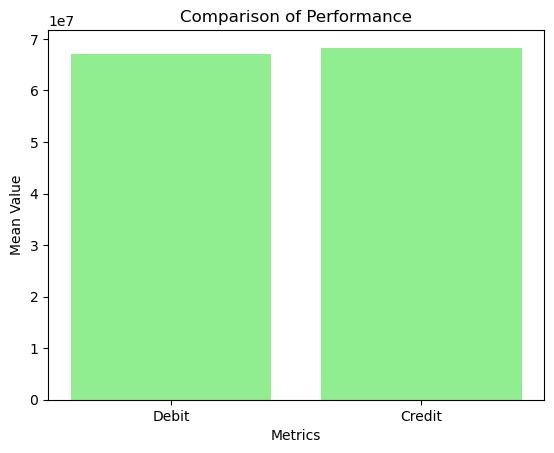

Debit Mean:  67149441.04166667
Credit Mean:  68287083.13113984
Debit Standard Deviation:  205271547.92217794
Credit Standard Deviation:  108000418.75152215
f-statistic:  nan
p-value:  nan


In [63]:
debit_data = total_debit_credit['Debit']
credit_data = total_debit_credit['Credit']

debit_mean = debit_data.mean()
credit_mean = credit_data.mean()

debit_std = debit_data.std()
credit_std = credit_data.std()

f_statistic2, p_value2 = stats.f_oneway(debit_data, credit_data)

metrics = ['Debit', 'Credit']
values = [debit_mean, credit_mean]

plt.bar(metrics, values, color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Performance')
plt.show()

print("Debit Mean: ", debit_mean)
print("Credit Mean: ", credit_mean)
print("Debit Standard Deviation: ", debit_std)
print("Credit Standard Deviation: ", credit_std)
print("f-statistic: ", f_statistic2)
print("p-value: ", p_value2)